## Brain Tumor Segmentation 2020 Dataset
BraTS 2020 utilizes multi-institutional pre-operative MRI scans and primarily focuses on the segmentation (Task 1) of intrinsically heterogeneous (in appearance, shape, and histology) brain tumors, namely gliomas. Furthemore, to pinpoint the clinical relevance of this segmentation task, BraTS’20 also focuses on the prediction of patient overall survival (Task 2), and the distinction between pseudoprogression and true tumor recurrence (Task 3), via integrative analyses of radiomic features and machine learning algorithms. Finally, BraTS'20 intends to evaluate the algorithmic uncertainty in tumor segmentation (Task 4).

#### Imaging Data Description
All BraTS multimodal scans are available as NIfTI files (.nii.gz) and describe a) native (T1) and b) post-contrast T1-weighted (T1Gd), c) T2-weighted (T2), and d) T2 Fluid Attenuated Inversion Recovery (T2-FLAIR) volumes, and were acquired with different clinical protocols and various scanners from multiple (n=19) institutions, mentioned as data contributors here.

All the imaging datasets have been segmented manually, by one to four raters, following the same annotation protocol, and their annotations were approved by experienced neuro-radiologists. Annotations comprise the GD-enhancing tumor (ET — label 4), the peritumoral edema (ED — label 2), and the necrotic and non-enhancing tumor core (NCR/NET — label 1), as described both in the BraTS 2012-2013 TMI paper and in the latest BraTS summarizing paper. The provided data are distributed after their pre-processing, i.e., co-registered to the same anatomical template, interpolated to the same resolution (1 mm^3) and skull-stripped.

Dataset: https://www.kaggle.com/datasets/awsaf49/brats20-dataset-training-validation

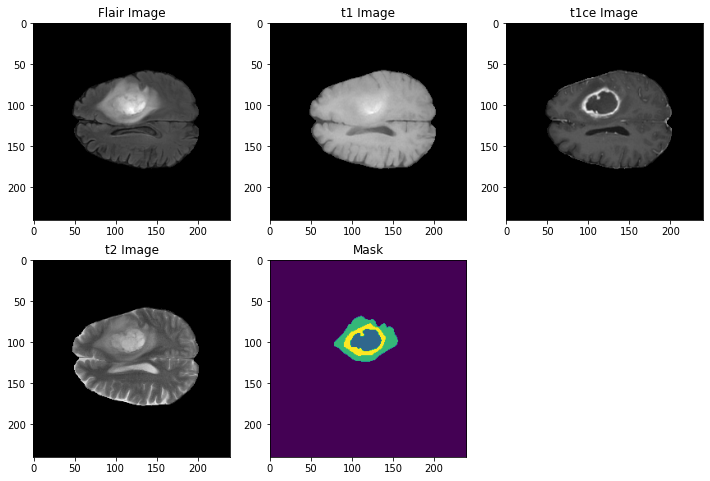

In [1]:
from keras.models import load_model
my_model = load_model('./brats_3d.hdf5', compile=False)

In [2]:
import numpy as np

test_img = np.load('./val/images/image_20.npy')
test_mask = np.load('./val/masks/mask_20.npy')
test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = my_model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]

print(test_prediction_argmax.shape)
print(test_mask_argmax.shape)
print(np.unique(test_prediction_argmax)) 

(128, 128, 128)
(128, 128, 128)
[0 1 2 3]


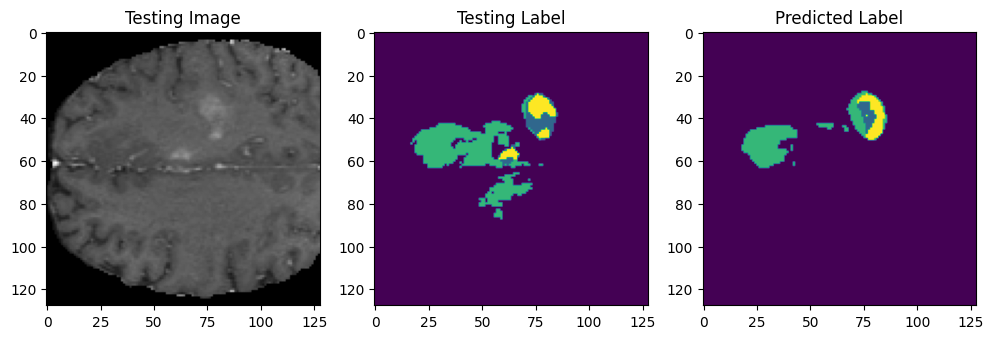

In [3]:
from matplotlib import pyplot as plt

n_slice = 87
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Predicted Label')
plt.imshow(test_prediction_argmax[:,:, n_slice])
plt.show()